## Training Models :
### Linear Regression, Lasso, Ridge, Logistic Regression, polynomial Regression, Softmax
### Gradient Descent : Batch GD, Mini-batch GD and Stochastic GD (iterative optimization approach).

#### Josefina Bollini - Data mining principles
#### Based on chapter 3  : 'Hands-On Machine Learning with Scikit-Learn & TensorFlow'

## Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np

#Generate some linear looking data to test the Regression

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new = np.array([[0], [2]])

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

array([[4.07800121],
       [9.87434388]])

When we have a large number of features, it could be useful to use :
### Gradient Descent
Generic optimization algorithm capabel of finding optimal solutions. We will tweak the parameters iteratively to minimize the cost function. Start with random parameters (random inizialization) and improve it gradually one step at the time always decreasing the cost function. Finally the algorithm will converge to the minimum.

We need to define the size f the steps or called learning rate. If too small then we will need many iterations to converge. but if its to high you might be on a higher cost than before and never getting to the minimum. 

For example, MSE function for linear regression is aconvex function which means there is no local minima just one global.So GD is garanteed to find the global minimum.

#### Batch GD: 
We need to conpute the gradent of the cost function using patial derivatives. All of them can be calculated together in the gradient vector noted ∇θMSE(θ). It is very slow as we use in every step all the training data. Although is still better than not using gardient descent


In [19]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta = np.random.randn(2,1) # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta

array([[4.07800121],
       [2.89817134]])

We have to make sure the learning rate is properly defined. 
If its too low, the algorithm will eventualy reach the solution ( in this LR because of the convexity of MSE function) but it will take longer. If too high, we might skip the optima. 

A good Learning rate can be found using GridSearch

Number of iterations: 
if too low, you might not find the optima
if too high its a watse
Solution: use very large number but interrupt the algorithm when the vector becomes tiny (tolerance)

In [21]:
# Stochastic GD:
# Some instances might been picked more than once, and other none. 
# Shuffling the training every round set could help
n_epochs = 50 # number of iterations
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
theta

array([[4.11743128],
       [2.83282894]])

#### Stochastic Gradient Descent 
Picks a random instance in the training set at every step and computes gradients only based on that observation. The algorithm is much faster , but is less regular, the cost function will bounce up and down decresing only on average. The result is something very close to the minimum but not optimal. this one works better when the cost function is irregular. 

We can also, decrease the learning rate iteration by iteration. So the steps get smaller and smaller so as the algorithm settle at the global minima. The steps are done depending on the 'learning schedule'. 

In [23]:
# Regression + Gradient Descent in Scikit learn
# run 50 epochs , starting at 0.1 learning rate 
# the default learning schedule is ’invscaling’: eta = eta0 / pow(t, power_t)
# other option is 'constant' eta=eta0
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.06508444]), array([2.95974361]))

#### Mini-batch Gradient Descent 

at each step, instead of computing the gradients based on the full training
set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called minibatches.

### Polynomial Regression
If the data is not a stright line, you can still use a linear model to fit nonlinear data. Adding power of each featyre as new feature and then train a linear model on this extended set of features. 

In [26]:
m = 100
# generate nonlinear data - juts using quadratic equation
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

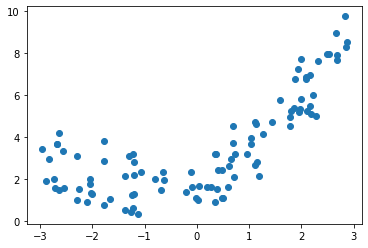

In [27]:
import matplotlib.pyplot as plt 
plt.scatter(X, y)
plt.show()

In [30]:
# For transforming and trainign the data :
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) # X_poly now includes the square of the features


In [31]:
# Fitting the linear regression:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.91519261]), array([[1.01536783, 0.48718703]]))

In [35]:
# Learning Curves : plots that show the models performance on the training set and validation set 
# as a funtion of the training set size
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Train the model several times on different sized subsets of the training set
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

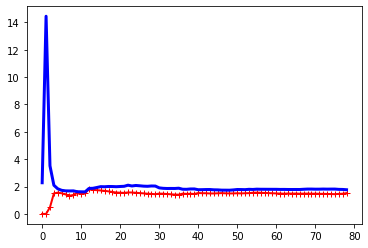

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

When the model is trained in very few training instances, it is capable of generalizing properly which is why and that is why the validation error is big. Then as the model is shown more training examples, it learns and the validation error slowly goes down. 

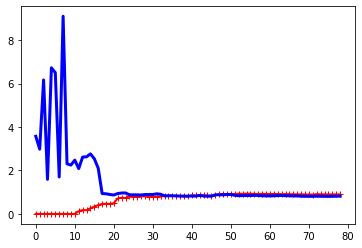

In [37]:
# 10 degree polinomial model on the same data
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("sgd_reg", LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

The error on the training dtaa is much lower than with only Linear Regression. the gap is also smaller.Which is a sigg of overfitting . 
#### One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error

### The Bias-Variance Trade off

A model's generalization error is the sum of:

1. BIAS: Result of wrong assumptions. For example when we assume the data is linear and its quadratic. A high bias model is more likely to underfit.

2. VARIANCE: Result of model's sensitivity to small variations in the training data. The higher degrees of freedon the higher variance, and there is a risk of overfitting

3. IRREDUCIBLE ERROR: Result of noise in the data. can only be reduced by cleaning the data .

#### Increasing complexity reduces bias but increases variance, and vice versa.


### Regularized Linear models 
Constraining the weights of the model
Ridge Regression - Lasso Regression - Elastic Net

#### Ridge Regression
a regularization term is added to the cost function (MSE) so the learning algorithm fits the data but also keep the weights as small as possible. this term should only be added during training. The validation should be done using the unregularized measure

Hyperparameter = Alpha, if alpha = 0 then is a linear regression
We should always scale the data as it is sensitive to the scale of the input features


In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="auto") # Auto choose the best accordign to the data - is the default
# solver{‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’, ‘lbfgs’}, default=’auto’
# ‘cholesky’ uses the standard scipy.linalg.solve function to obtain a closed-form solution.
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.86082422]])

In [39]:
# adding the stochastic GD:
sgd_reg = SGDRegressor(penalty="l2") # penalty hyperparameter is the regularization to use. l2 is l2 norm (Ridge)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.81932953])

#### Lasso Regression
Least Absolute shrinkage and selection operator Regression 
Also adds a regularization term to the cost function but using l1 norm 

Something interesting to know: Lasso Reg tends to eliminate weights on the least important features. 

In [41]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.81951478])

#### Elastic Net
Something in the middle between ridge and lasso.
Regularization term is a mix of both, the user can control the ratio of each.

r = 0 ---> Ridge

r = 1 ---> Lasso

Which one to use? Generally you wanna choose at least one. Ridge is a good defaultbut if you think only few features are useful, maybe lasso is better. Elastic net is generally preffered to Lasso 

In [42]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.82105771])

### Logistic Regression

Used to estimate the probability that an instance belongs to a particular class. 
If the estimated prb > 0.5 ---> positive class  = 1
Is a binary identifier
The objective is to find a set of parameter vector theta so that the model estimates high probabilities for positive instances and and low probabilities for negative instances.

Its cost function is convex, so GD is guaranteed to find its global minimum.
Using the iris dataset, we can use logistic regression to detect Iris-Virginica based only on the petal width:

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

/var/folders/tr/q_709j197n3f6py54vpmh1tw0000gn/T/ipykernel_47523/3381727819.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0


In [3]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

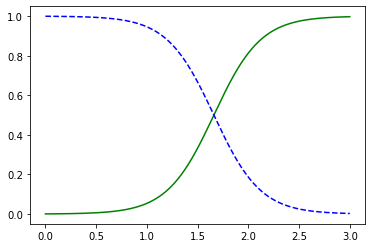

In [5]:
import matplotlib.pyplot as plt 
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

Decision boundaru when lines cross. even though there is an overlap in observations, (the Iris Virginica flowers with bigger petals and the others with smallest petals). above 2 cm the classifier gets pretty confident that it can identify the Virginicas (High probability) and lower than 1cm its very confident that is not Virginica. In the middle, the classifier is unsure.

In [12]:
log_reg.predict([[1.67], [1.5]])
# probability if a new flower is a virginica given that I know the petal length
# bound at = 1.66

array([1, 0])

### Softmax Regression or Multinomial Logistic Regression ( Generalized model for multi classes)
In any cases, is multi class but not multi output. It will still predicts the obs to belong to one class and not all others. 

When given an instance x, the Softmax Regression model
first computes a score sk(x) for each class k, then estimates the probability of each
class by applying the softmax function (also called the normalized exponential) to the
scores. The equation to compute sk(x) should look familiar, as it is just like the equation
for Linear Regression prediction. Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
the class with the highest estimated probability (which is simply the class with the
highest score)

In [13]:
# we can use Softmax to classify the 3 kind of flowers using multi_class = 'Multinomial'
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]

# we should also specify the solver 
# more info about solvers: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [14]:
softmax_reg.predict([[5, 2]])

array([2])

In [15]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

Notice that the model can predict a class that has an estimated probability below
50%. For example, at the point where all decision boundaries meet, all classes have an
equal estimated probability of 33%.